# Trabalho Prático 1 - Introdução à Banco de Dados

Criação e manipulação de um banco de dados baseado nas despezas públicas do governo federal brasileiro.

## Imports

In [144]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Criação da Conexão

In [151]:
conn = sqlite3.connect('../tp1.db')
cursor = conn.cursor()

## Carga dos Dados

In [146]:
#f = io.open('../despesas_publicas_tp1.sql', 'r')
#sql = f.read()
#cursor.executescript(sql)

## Requisições
As requisições a serem feitas são escolhidas em função do número de matrícula do estudante. Dessa forma, as requisições definidas foram as de número 1, 2, 3, 8, 10 e 11.

### Requisição 1
Liste todos os códigos e nomes de funções da subfunção que possui o maior número de funções.

In [147]:
df = pd.read_sql_query("select f.COD_FUNCAO, f.NOME_FUNCAO " +
                       "from FUNCAO as f natural join DETALHAMENTO_FUNCAO as df " +
                       "where df.COD_SUBFUNCAO = (select COD_SUBFUNCAO from DETALHAMENTO_FUNCAO " +
                       "group by COD_SUBFUNCAO order by count(COD_SUBFUNCAO) desc limit 1)", conn)
df


,COD_FUNCAO,NOME_FUNCAO
0,5,Defesa nacional
1,6,Segurança pública
2,26,Transporte


### Requisição 2
Liste a média de despesas públicas por função (nome) e subfunção (nome), apenas nos casos em que a média excedeu mil reais.

In [148]:
df = pd.read_sql_query("select f.NOME_FUNCAO, sf.NOME_SUBFUNCAO, mt.MEDIA " +
                       "from FUNCAO as f natural join DETALHAMENTO_FUNCAO as df natural join SUBFUNCAO as sf " +
                       "natural join (select COD_DETALHAMENTO, avg(VALOR_DESPESA) as MEDIA " +
                       "from DESPESA_PUBLICA group by COD_DETALHAMENTO) as mt where mt.MEDIA > 1000", conn)
df

,NOME_FUNCAO,NOME_SUBFUNCAO,MEDIA
0,Assistência social,Tecnologia da informação,2266.087692
1,Assistência social,Assistência comunitária,1713.411805
2,Educação,Ensino profissional,1826.135152
3,Educação,Educação básica,4398.185000


### Requisição 3
Liste todos os nomes dos programas de governo e o valor das despesas totais no ano de 2018 para os mesmos, ordenando de forma decrescente pelo valor.

In [149]:
df = pd.read_sql_query("select pg.NOME_PROGRAMA_GOVERNO, sum(VALOR_DESPESA) as DESPESAS_2018 " +
                       "from PROGRAMA_GOVERNO as pg natural join (select * from DESPESA_PUBLICA " +
                       "where ANO_DESPESA = 2018) as A group by COD_PROGRAMA_GOVERNO " +
                       "order by DESPESAS_2018 desc", conn)
df

,NOME_PROGRAMA_GOVERNO,DESPESAS_2018
0,BRASIL SEM MISERIA,387175.60
1,ENEM,334262.06
2,PRONATEC,60262.46
3,CONTROLE DO CANCER,38971.19
4,MAIS MEDICOS,14400.00
5,REGULARIZACAO FUNDIARIA,1497.26
6,REDE CEGONHA,1210.00
7,VIVER SEM LIMITE,0.00
8,SOS EMERGENCIA,0.00
9,MELHOR EM CASA,0.00


#### Visualização da Requisição 3
Programas com gasto 0 foram retirados da amostra para facilitar a visualização.

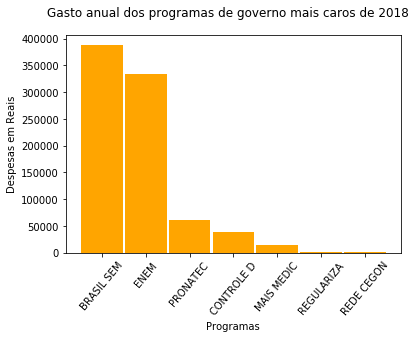

In [150]:
df.drop(df[df['DESPESAS_2018'] == 0].index, inplace=True)
x_axis = df.NOME_PROGRAMA_GOVERNO.tolist()
y_axis = df.DESPESAS_2018.tolist()
for i in range(len(x_axis)):
    x_axis[i] = x_axis[i][0:10]

plt.bar(range(len(x_axis)), y_axis, 0.95, color='orange')
plt.xlabel('Programas')
plt.ylabel('Despesas em Reais')
plt.xticks(range(len(x_axis)), x_axis, rotation=50)
plt.suptitle('Gasto anual dos programas de governo mais caros de 2018')
plt.show()

### Requisição 8
Liste os nomes das subfunções das despesas públicas envolvidas para cada órgão governamental, apenas nos casos em que o valor total das despesas excedeu 10 mil reais. Sua consulta deve retornar o nome do órgão, a subfunção da despesa, a quantidade de entradas de despesas públicas e o valor total dessas despesas.

### Requisição 10
Liste todas as despesas públicas (código da despesa, mês e ano da despesa, modalidade, valor), ordenadas de forma decrescente pelo valor, em que o programa de governo é aquele que possui o maior valor total em despesas durante o ano de 2018.

In [153]:
df = pd.read_sql_query("select COD_DESPESA, MES_DESPESA, ANO_DESPESA, MODALIDADE_DESPESA, VALOR_DESPESA " +
                       "from DESPESA_PUBLICA where COD_PROGRAMA_GOVERNO = (select COD_PROGRAMA_GOVERNO " +
                       "from DESPESA_PUBLICA group by COD_PROGRAMA_GOVERNO " +
                       "order by sum(VALOR_DESPESA) desc limit 1) order by VALOR_DESPESA desc", conn)
df

,COD_DESPESA,MES_DESPESA,ANO_DESPESA,MODALIDADE_DESPESA,VALOR_DESPESA
0,1013,4,2018,TRANSFERENCIAS A MUNICIPIOS - FUNDO A FUNDO,219668.07
1,60,11,2018,Reserva de Contingência,81120.13
2,973,3,2018,Reserva de Contingência,58918.28
3,858,10,2018,Reserva de Contingência,19250.00
4,28,2,2018,Reserva de Contingência,8215.70
5,58,9,2018,Reserva de Contingência,3.42
6,0,11,2018,Reserva de Contingência,0.00
7,1,11,2018,Reserva de Contingência,0.00
8,2,12,2018,Reserva de Contingência,0.00
9,3,3,2018,Reserva de Contingência,0.00


#### VIsualização da Requisição 10
Despesas com gasto 0 foram retiradas da amostra para facilitar a visualização.

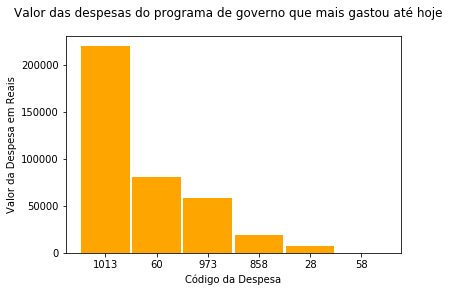

In [165]:
df.drop(df[df['VALOR_DESPESA'] == 0].index, inplace=True)
x_axis = df.COD_DESPESA.tolist()
y_axis = df.VALOR_DESPESA.tolist()

plt.bar(range(len(x_axis)), y_axis, 0.95, color='orange')
plt.xlabel('Código da Despesa')
plt.ylabel('Valor da Despesa em Reais')
plt.xticks(range(len(x_axis)), x_axis)
plt.suptitle('Valor das despesas do programa de governo que mais gastou até hoje')
plt.show()

### Requisição 11
Liste os códigos e nomes dos órgãos governamentais relacionados ao programa de governo (ou programas, caso haja empate) que alcançou mais registros de despesas públicas durante o ano.

In [168]:
df = pd.read_sql_query("select distinct o.COD_ORGAO, o.NOME_ORGAO from ORGAO as o " +
                       "natural join DESPESA_PUBLICA as dp " +
                       "where dp.COD_PROGRAMA_GOVERNO = (select COD_PROGRAMA_GOVERNO from DESPESA_PUBLICA " +
                       "group by COD_PROGRAMA_GOVERNO order by count(COD_PROGRAMA_GOVERNO) desc limit 1)", conn)
df

,COD_ORGAO,NOME_ORGAO
0,20000,Presidência da República
1,22000,"Ministério da Agricultura, Pecuária e Abastec"
2,24000,"Ministério da Ciência, Tecnologia, Inovações"
3,25000,Ministério da Fazenda
4,26000,Ministério da Educação
5,36000,Ministério da Saúde
6,44000,Ministério do Meio Ambiente
7,52000,Ministério da Defesa
8,53000,Ministério da Integração Nacional
9,55000,Ministério do Desenvolvimento Social


In [142]:
conn.close()